In [178]:
from __future__ import print_function, division



import thinkplot
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline


from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.api as sm



In [2]:
#Dataset#1:  CVE® is a list of publicly disclosed cybersecurity vulnerabilities.obtained from mitre.org.  
# Data generated in 2022-01-21.  Data is from Jan 1999 to Jan 2022.
allitems = pd.read_csv("allitems.csv")
allitems.head()
#WE just needed the first column data. I will be extracting the year from this column as will be my dependent variable as CVE
# listed is identified by year.


,Description
0,CVE-1999-0001
1,CVE-1999-0002
2,CVE-1999-0003
3,CVE-1999-0004
4,CVE-1999-0005


In [3]:
type(allitems)
# shows the data is in a dataframe

pandas.core.frame.DataFrame

In [4]:
allitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226679 entries, 0 to 226678
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Description  226679 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


In [5]:
allitems['Year']=allitems['Description'].str.split('-').str[1]
allitems.head()
allitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226679 entries, 0 to 226678
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Description  226679 non-null  object
 1   Year         226679 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [6]:
allitems['Vulnerabilities']=allitems['Description']
allitems.head()

,Description,Year,Vulnerabilities
0,CVE-1999-0001,1999,CVE-1999-0001
1,CVE-1999-0002,1999,CVE-1999-0002
2,CVE-1999-0003,1999,CVE-1999-0003
3,CVE-1999-0004,1999,CVE-1999-0004
4,CVE-1999-0005,1999,CVE-1999-0005


In [7]:
Y=allitems['Year']
Y.min()

'1999'

In [8]:
Y.max()


'2022'

In [223]:
allitems.describe(include='all')

,Description,Year,Vulnerabilities
count,226679,226679,226679
unique,226679,24,226679
top,CVE-1999-0001,2020,CVE-1999-0001
freq,1,31086,1


In [9]:
## Dataset2:  Read the cyber-operations-incidents.csv containing the CVS of cyber incidents from 2005 to 2020, as reported by the
##Council of Foreign Relations 

In [10]:
cyberops_df = pd.read_csv("cyber-operations-incidents.csv")
cyberops_df.head()

cyberops_df.tail(10)


,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3
471,Compromise of the Pentagon’s NIPRNet,8/17/2006,NaN,Threat actors accessed unclassified informatio...,NaN,U.S. Department of Defense,China,Espionage,Military,http://www.csmonitor.com/2007/0914/p01s01-woap...,http://gcn.com/articles/2006/08/17/red-storm-r...,NaN
472,Compromise at U.S. Naval War College,12/4/2006,NaN,This undefined cyber incident at the U.S. Nava...,NaN,Naval War College,China,Espionage,Military,http://fcw.com/articles/2006/12/04/china-is-su...,http://www.nbcnews.com/id/16057306/ns/technolo...,NaN
473,Titan Rain,8/25/2005,Believed to be partially the work of PLA Unit ...,Titan Rain was a string of cyber operations th...,NaN,"U.S. Department of State, U.S. Department of D...",China,Espionage,"Military, Government",http://www.washingtonpost.com/wp-dyn/content/a...,http://content.time.com/time/magazine/article/...,http://www.theguardian.com/technology/2007/sep...
474,Trisis,NaN,Also known as Triton and Xenotime,This threat actor targets the Triconex safety ...,NaN,Saudi Arabia,NaN,Sabotage,Private sector,https://www.fireeye.com/blog/threat-research/2...,https://www.fireeye.com/blog/threat-research/2...,https://dragos.com/blog/trisis/TRISIS-01.pdf
475,APT-C-23,NaN,Also known as AridViper and Desert Falcon.,Previously targeted Israeli soldiers by preten...,NaN,Israel Defense Forces,"Palestine, State of",NaN,NaN,https://www.bleepingcomputer.com/news/security...,https://research.checkpoint.com/2020/hamas-and...,https://malpedia.caad.fkie.fraunhofer.de/actor...
476,"Compromises of government embassies, telecommu...",NaN,Believed to be the work of MuddyWater.,A group has attacked 131 victims in thirty org...,NaN,"Russian Federation, Pakistan, Saudi Arabia, Tu...",Iran (Islamic Republic of),Espionage,"Government, Private sector",https://www.symantec.com/blogs/threat-intellig...,https://www.cyberscoop.com/middle-east-group-g...,NaN
477,Kimusky,NaN,Also known as Thallium and Smoke Screen,This threat actor targeted foreign ministries ...,NaN,"France, Slovakia, Stanford University, U.S. Th...",NaN,NaN,"Government, Private sector",https://blog.prevailion.com/2019/09/autumn-ape...,NaN,NaN
478,Leafminer,NaN,NaN,This threat actor targets government organizat...,NaN,"Egypt, Israel, Saudi Arabia, United Arab Emira...",Iran (Islamic Republic of),NaN,"Private sector, Government",https://www.symantec.com/blogs/threat-intellig...,NaN,NaN
479,Allanite,NaN,Believed to be responsible for the targeting o...,This threat actor targets business and industr...,NaN,"United States, United Kingdom",Russian Federation,Espionage,Private sector,https://dragos.com/blog/20180510Allanite.html,https://www.us-cert.gov/ncas/alerts/TA17-293A,NaN
480,Targeting of sporting and anti-doping organiza...,NaN,APT 28,Just prior to news reports suggesting that the...,NaN,Sixteen national and international sporting an...,Russian Federation,Espionage,"Civil society, Government",https://blogs.microsoft.com/on-the-issues/2019...,https://www.zdnet.com/article/microsoft-russia...,https://www.wired.com/story/fancy-bear-antidop...


In [11]:
cyberops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         481 non-null    object
 1   Date          474 non-null    object
 2   Affiliations  347 non-null    object
 3   Description   481 non-null    object
 4   Response      86 non-null     object
 5   Victims       453 non-null    object
 6   Sponsor       439 non-null    object
 7   Type          447 non-null    object
 8   Category      458 non-null    object
 9   Sources_1     475 non-null    object
 10  Sources_2     355 non-null    object
 11  Sources_3     168 non-null    object
dtypes: object(12)
memory usage: 45.2+ KB


In [12]:



cyberops_df['Year']=cyberops_df['Date'].str.split('/').str[2]
cyberops_df['Year']
cyberops_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         481 non-null    object
 1   Date          474 non-null    object
 2   Affiliations  347 non-null    object
 3   Description   481 non-null    object
 4   Response      86 non-null     object
 5   Victims       453 non-null    object
 6   Sponsor       439 non-null    object
 7   Type          447 non-null    object
 8   Category      458 non-null    object
 9   Sources_1     475 non-null    object
 10  Sources_2     355 non-null    object
 11  Sources_3     168 non-null    object
 12  Year          474 non-null    object
dtypes: object(13)
memory usage: 49.0+ KB


In [13]:
df2 = cyberops_df[["Year", "Category", "Type","Description","Title", "Affiliations", "Victims", "Sponsor" ]]

df2.tail(10)

,Year,Category,Type,Description,Title,Affiliations,Victims,Sponsor
471,2006,Military,Espionage,Threat actors accessed unclassified informatio...,Compromise of the Pentagon’s NIPRNet,NaN,U.S. Department of Defense,China
472,2006,Military,Espionage,This undefined cyber incident at the U.S. Nava...,Compromise at U.S. Naval War College,NaN,Naval War College,China
473,2005,"Military, Government",Espionage,Titan Rain was a string of cyber operations th...,Titan Rain,Believed to be partially the work of PLA Unit ...,"U.S. Department of State, U.S. Department of D...",China
474,NaN,Private sector,Sabotage,This threat actor targets the Triconex safety ...,Trisis,Also known as Triton and Xenotime,Saudi Arabia,NaN
475,NaN,NaN,NaN,Previously targeted Israeli soldiers by preten...,APT-C-23,Also known as AridViper and Desert Falcon.,Israel Defense Forces,"Palestine, State of"
476,NaN,"Government, Private sector",Espionage,A group has attacked 131 victims in thirty org...,"Compromises of government embassies, telecommu...",Believed to be the work of MuddyWater.,"Russian Federation, Pakistan, Saudi Arabia, Tu...",Iran (Islamic Republic of)
477,NaN,"Government, Private sector",NaN,This threat actor targeted foreign ministries ...,Kimusky,Also known as Thallium and Smoke Screen,"France, Slovakia, Stanford University, U.S. Th...",NaN
478,NaN,"Private sector, Government",NaN,This threat actor targets government organizat...,Leafminer,NaN,"Egypt, Israel, Saudi Arabia, United Arab Emira...",Iran (Islamic Republic of)
479,NaN,Private sector,Espionage,This threat actor targets business and industr...,Allanite,Believed to be responsible for the targeting o...,"United States, United Kingdom",Russian Federation
480,NaN,"Civil society, Government",Espionage,Just prior to news reports suggesting that the...,Targeting of sporting and anti-doping organiza...,APT 28,Sixteen national and international sporting an...,Russian Federation


In [14]:
cyberopsfinal_df = df2.copy() # Create duplicate of data
cyberopsfinal_df.dropna(subset = ['Year'], inplace = True) 
cyberopsfinal_df.tail()
#I removed the Nan or blank Year rows by using the dropna command 
#as above.  The number of records reduced from 481 to 474.
#Below shows 473 as first index row is 0 but total records are 474.
cyberopsfinal_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 473
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          474 non-null    object
 1   Category      452 non-null    object
 2   Type          443 non-null    object
 3   Description   474 non-null    object
 4   Title         474 non-null    object
 5   Affiliations  341 non-null    object
 6   Victims       446 non-null    object
 7   Sponsor       434 non-null    object
dtypes: object(8)
memory usage: 33.3+ KB


In [15]:
Type_category=cyberopsfinal_df.groupby(['Type']).count()
Type_category
#As seen below, espionage has the highest frequency than any other type in aggregate.

,Year,Category,Description,Title,Affiliations,Victims,Sponsor
Type,,,,,,,
Data destruction,14,14,14,14,11,13,12
Defacement,5,5,5,5,3,5,5
Denial of service,18,18,18,18,6,18,18
Doxing,6,6,6,6,6,6,6
Espionage,371,361,371,371,270,353,338
Financial Theft,7,7,7,7,7,7,7
Sabotage,22,22,22,22,17,22,21


In [225]:
cyberopsfinal_df.describe(include='all')

,Year,Category,Type,Description,Title,Affiliations,Victims,Sponsor
count,474,452,443,474,474,341,446,434
unique,16,24,7,472,470,257,381,39
top,2020,Private sector,Espionage,"Gamaredon, a Russian-speaking APT, targeted Uk...",Targeting of Ukrainian government entities,Believed to be the work of APT 28,United States,China
freq,88,126,371,3,4,15,21,167


In [16]:
### Dataset3:  Read the Security Incidents file.  This dataset looks at the data security incidents which have been reported to the Information
## Commissioners Office (ICO).


Secincident_df = pd.read_csv("Security Incident totals.csv")
Secincident_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Index                           140 non-null    int64  
 1   Quarter                         140 non-null    object 
 2   Financial Year                  140 non-null    object 
 3   Quarter Start                   140 non-null    object 
 4   Quarter End                     140 non-null    object 
 5   Cyber Security Incident?        140 non-null    object 
 6   Incident Type                   140 non-null    object 
 7   Central Government              87 non-null     float64
 8   Charitable and voluntary        106 non-null    float64
 9   Education and childcare         123 non-null    float64
 10  Finance, insurance and credit   115 non-null    float64
 11  General business                116 non-null    float64
 12  Health                          115 

In [17]:
#Next, I also extract the year from the Quarter End field as Year is my Dependent variable indicating
#also the occurance of a vulnerability.
Secincident_df['Year']=Secincident_df['Quarter End'].str.split('/').str[2]
Secincident_df.head()
Secincident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Index                           140 non-null    int64  
 1   Quarter                         140 non-null    object 
 2   Financial Year                  140 non-null    object 
 3   Quarter Start                   140 non-null    object 
 4   Quarter End                     140 non-null    object 
 5   Cyber Security Incident?        140 non-null    object 
 6   Incident Type                   140 non-null    object 
 7   Central Government              87 non-null     float64
 8   Charitable and voluntary        106 non-null    float64
 9   Education and childcare         123 non-null    float64
 10  Finance, insurance and credit   115 non-null    float64
 11  General business                116 non-null    float64
 12  Health                          115 

In [18]:
Secincident_df['Year'].min()

'2019'

In [19]:
Secincident_df['Year'].max()

'2020'

In [20]:
Secincident_df.groupby(['Cyber Security Incident?']).count()



,Index,Quarter,Financial Year,Quarter Start,Quarter End,Incident Type,Central Government,Charitable and voluntary,Education and childcare,"Finance, insurance and credit",...,Regulators,Religious,Retail and manufacture,Social care,Transport and leisure,Unassigned,Utilities,Sum of complaint categories,Total Complaints,Year
Cyber Security Incident?,,,,,,,,,,,,,,,,,,,,,
N,90,90,90,90,90,90,66,67,77,73,...,22,30,70,60,63,0,43,90,90,90
Y,50,50,50,50,50,50,21,39,46,42,...,5,16,46,21,35,1,18,50,50,50


In [21]:
##Analyzing the file as shown above, found out that not every record is a breach.  
# We will filter only those records where cyber incidents happened

df2 = Secincident_df[(Secincident_df['Cyber Security Incident?'] == 'Y')]
Secincidentfinal_df = df2[["Year","Cyber Security Incident?", "Incident Type"]]

Secincidentfinal_df.head()

Secincidentfinal_df.info()

Secincidentfinal_df["Year"].min()

Secincidentfinal_df["Year"].max()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 139
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Year                      50 non-null     object
 1   Cyber Security Incident?  50 non-null     object
 2   Incident Type             50 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


'2020'

In [22]:
Secincidentfinal_df.head()


,Year,Cyber Security Incident?,Incident Type
0,2019,Y,Unauthorised access
1,2019,Y,Brute Force
2,2019,Y,Hardware/software misconfiguration
3,2019,Y,Malware
4,2019,Y,Other cyber incident


In [226]:
Secincidentfinal_df.describe(include='all')

,Year,Cyber Security Incident?,Incident Type
count,50,50,50
unique,2,1,8
top,2020,Y,Unauthorised access
freq,29,50,7


In [228]:


#Dataset#4:  Read the PRC Data Breach Chronology.csv" file.  It contains the Security incidents in the US 
#collected by a non-profit. 9015 records.  Oldest date of incident January 2005 and the latest October 2019. 
#No data in 2020.  These are all incidents in the US.

PRCBreach_df = pd.read_csv("PRC Data Breach Chronology.csv")
PRCBreach_df.head()


,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach,Latitude,Longitude,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,3/3/2006,PayDay OK LLC,NaN,New Jersey,HACK,BSF,88,The company's website was breached sometime ar...,California Attorney General,https://oag.ca.gov/,2006,40.058324,-74.405661,NaN,NaN,NaN
1,1/4/2012,"SF Fire Credit Union, Pacifica-Coastside Credi...",San Francisco,California,PORT,BSF,0,"The December 29, 2011 theft of a laptop from a...",California Attorney General,NaN,2012,37.774930,-122.419416,NaN,NaN,NaN
2,2/18/2012,"BDO USA, Rubio's Restaurants, Inc.",San Diego,California,PORT,BSR,0,BDO was contracted by Rubio's to perform finan...,California Attorney General,NaN,2012,32.715329,-117.157255,NaN,NaN,NaN
3,2/22/2012,"DHI Mortgage Company, Ltd.",Austin,Texas,HACK,BSF,0,"On February 10, 2012, DHI Mortgage became awar...",California Attorney General,NaN,2012,30.267153,-97.743061,NaN,NaN,NaN
4,3/12/2012,"Impairment Resources, LLC",San Diego,California,PORT,MED,"14,000",An office burglary on New Year's Eve 2011 resu...,California Attorney General,NaN,2012,32.715329,-117.157255,NaN,NaN,NaN


In [229]:
PRCBreach_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date Made Public         9015 non-null   object 
 1   Company                  9015 non-null   object 
 2   City                     5690 non-null   object 
 3   State                    8436 non-null   object 
 4   Type of breach           8926 non-null   object 
 5   Type of organization     9015 non-null   object 
 6   Total Records            9009 non-null   object 
 7   Description of incident  9012 non-null   object 
 8   Information Source       8962 non-null   object 
 9   Source URL               3607 non-null   object 
 10  Year of Breach           9015 non-null   int64  
 11  Latitude                 6541 non-null   float64
 12  Longitude                6541 non-null   float64
 13  Unnamed: 13              0 non-null      float64
 14  Unnamed: 14             

In [230]:
PRCBreach_df['Year of Breach'].max()

2019

In [231]:
PRCBreach_df['Year of Breach'].min()


2005

In [232]:
##Analyzing the file as shown above, found out that not every record is a cyber breach.  We will filter only those records 
#where cyberincidents happened.  THere are total 2533 records as opposed to 9015 in the original dataset.
df_PRC= PRCBreach_df[(PRCBreach_df['Type of breach'] == 'HACK')]
PRCBreach_final_df = df_PRC[["Year of Breach","Type of breach"]]

PRCBreach_final_df.head()
PRCBreach_final_df.info()

PRCBreach_final_df["Year of Breach"].min()
PRCBreach_final_df["Year of Breach"].max()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2533 entries, 0 to 8962
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year of Breach  2533 non-null   int64 
 1   Type of breach  2533 non-null   object
dtypes: int64(1), object(1)
memory usage: 59.4+ KB


2019

In [233]:
PRCBreach_final_df.head()

,Year of Breach,Type of breach
0,2006,HACK
3,2012,HACK
8,2012,HACK
15,2012,HACK
16,2012,HACK


HISTOGRAMS/PLOTS Of VARIABLES

In [235]:
PRCBreach_final_df.describe(include='all')

,Year of Breach,Type of breach
count,2533.000000,2533
unique,NaN,1
top,NaN,HACK
freq,NaN,2533
mean,2013.680221,NaN
std,3.330823,NaN
min,2005.000000,NaN
25%,2012.000000,NaN
50%,2014.000000,NaN
75%,2016.000000,NaN


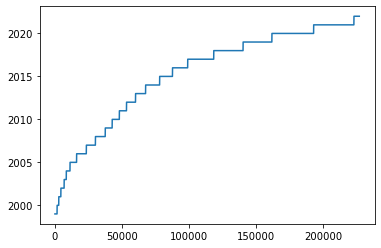

In [29]:
#Dataset1:  NAME (CVEs vs. Year)




dfallitems=Y.astype(float)
#where Y was calculated above as Y=allitems['Year']. Year was extracted from the description field of the vulnerability.
# The plot shows that the number of vulnerabilities are increasing by year.

dfallitems.plot()
plt.show()



(array([ 1579.,  1243.,     0.,  1573.,  2436.,     0.,  1600.,  2779.,
            0.,  4899.,  7254.,     0.,  6763.,  7321.,     0.,  5160.,
         5340.,     0.,  5336.,  6723.,     0.,  7493., 10453.,     0.,
         9573., 11322.,     0., 19395., 21859.,     0., 21460., 31086.,
            0., 30002.,  4030.]),
 array([1999.        , 1999.65714286, 2000.31428571, 2000.97142857,
        2001.62857143, 2002.28571429, 2002.94285714, 2003.6       ,
        2004.25714286, 2004.91428571, 2005.57142857, 2006.22857143,
        2006.88571429, 2007.54285714, 2008.2       , 2008.85714286,
        2009.51428571, 2010.17142857, 2010.82857143, 2011.48571429,
        2012.14285714, 2012.8       , 2013.45714286, 2014.11428571,
        2014.77142857, 2015.42857143, 2016.08571429, 2016.74285714,
        2017.4       , 2018.05714286, 2018.71428571, 2019.37142857,
        2020.02857143, 2020.68571429, 2021.34285714, 2022.        ]),
 <BarContainer object of 35 artists>)

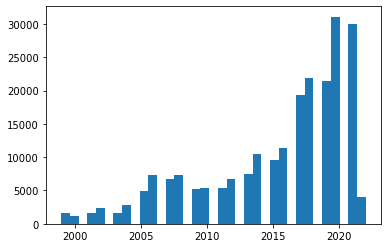

In [30]:
#Another way of showing it via Histogram.
plt.hist(dfallitems, bins=35, label = 'Data')

In [31]:
#Dataset2 - cyber-operations-incidents.csv containing the CVS of cyber incidents from 2005 to 2020 (Incidents (Name) vs.
#Year (I computed this variable from the date field))

#As seen above I had to create the Year field and extracting it from the Date field so I can compare with the no. on 
#incidents


(array([ 1.,  0.,  3.,  0., 10.,  0.,  0.,  7.,  0.,  4.,  0.,  9.,  0.,
         0., 15.,  0., 12.,  0., 19.,  0.,  0., 35.,  0., 34.,  0., 33.,
         0.,  0., 46.,  0., 81.,  0., 77.,  0., 88.]),
 array([2005.        , 2005.42857143, 2005.85714286, 2006.28571429,
        2006.71428571, 2007.14285714, 2007.57142857, 2008.        ,
        2008.42857143, 2008.85714286, 2009.28571429, 2009.71428571,
        2010.14285714, 2010.57142857, 2011.        , 2011.42857143,
        2011.85714286, 2012.28571429, 2012.71428571, 2013.14285714,
        2013.57142857, 2014.        , 2014.42857143, 2014.85714286,
        2015.28571429, 2015.71428571, 2016.14285714, 2016.57142857,
        2017.        , 2017.42857143, 2017.85714286, 2018.28571429,
        2018.71428571, 2019.14285714, 2019.57142857, 2020.        ]),
 <BarContainer object of 35 artists>)

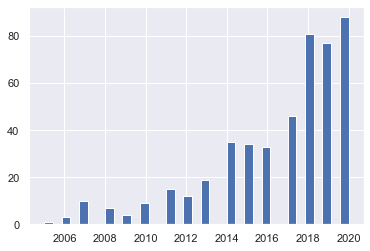

In [190]:
X=cyberopsfinal_df['Year']
dfcyberopsfinal_df=X.astype(float)
plt.hist(dfcyberopsfinal_df, bins=35, label = 'Data')



In [33]:
#  In this dataset, we also had a type of incident field.  We wanted to see which type of incident was more pronounced in our data

#Make another histogram by Type


In [34]:
Type_category=cyberopsfinal_df.groupby(['Type']).count()
Type_category

,Year,Category,Description,Title,Affiliations,Victims,Sponsor
Type,,,,,,,
Data destruction,14,14,14,14,11,13,12
Defacement,5,5,5,5,3,5,5
Denial of service,18,18,18,18,6,18,18
Doxing,6,6,6,6,6,6,6
Espionage,371,361,371,371,270,353,338
Financial Theft,7,7,7,7,7,7,7
Sabotage,22,22,22,22,17,22,21


In [35]:
df4=cyberopsfinal_df.groupby(['Type']).size().reset_index(name='Count')
df4.head()
# reset_index() converts the above series back to dataframe. name='Count' changes 0 label for count column to "Count"

,Type,Count
0,Data destruction,14
1,Defacement,5
2,Denial of service,18
3,Doxing,6
4,Espionage,371


In [36]:
df5=cyberopsfinal_df.groupby(['Year', 'Type']).size().reset_index(name="Count2")
df5.head()



,Year,Type,Count2
0,2005,Espionage,1
1,2006,Espionage,3
2,2007,Denial of service,3
3,2007,Espionage,7
4,2008,Denial of service,1


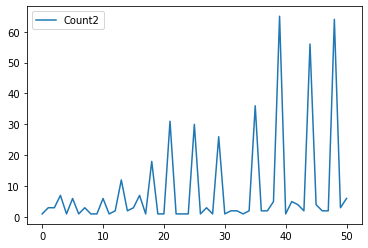

In [37]:
df5.plot()
plt.show()



<AxesSubplot:title={'center':'Frequency by Type of Cyber Incident - Dataset2'}>

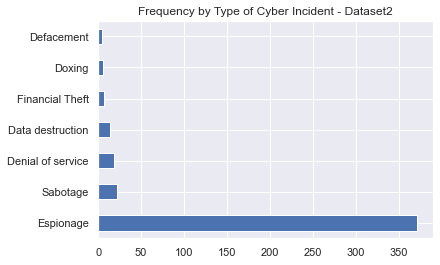

In [188]:
cyberopsfinal_df["Type"].value_counts().plot(kind='barh', title="Frequency by Type of Cyber Incident - Dataset2")
# As you can see Espionage has the most occurances.





In [39]:
# Dataset3: Read the Security Incidents file.  This dataset looks at the data security incidents which have been 
#reported to the Information Commissioners Office (ICO).

In [40]:
Secincidentfinal_df['Incident Type'].value_counts()

Unauthorised access                   7
Brute Force                           7
Hardware/software misconfiguration    7
Malware                               7
Other cyber incident                  7
Phishing                              7
Ransomware                            7
Denial of service                     1
Name: Incident Type, dtype: int64

<AxesSubplot:title={'center':'Frequency by Type of Cyber Incident = Dataset3'}>

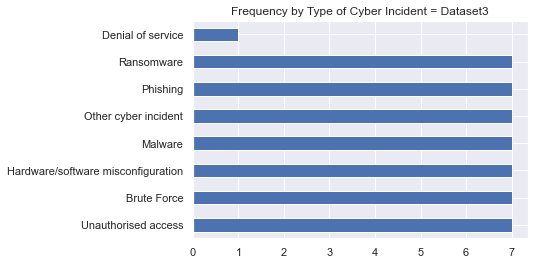

In [187]:
Secincidentfinal_df['Incident Type'].value_counts().plot(kind='barh', title="Frequency by Type of Cyber Incident = Dataset3")


<AxesSubplot:title={'center':'Frequency by Year of Cyber Incident'}>

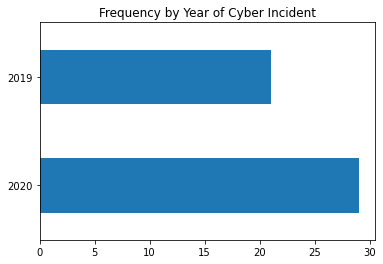

In [42]:
Secincidentfinal_df['Year'].value_counts().plot(kind='barh', title="Frequency by Year of Cyber Incident")

#SHows that there were more incidents in 2020 compared to 2021.

<AxesSubplot:title={'center':'Frequency by Year of Cyber Incident'}>

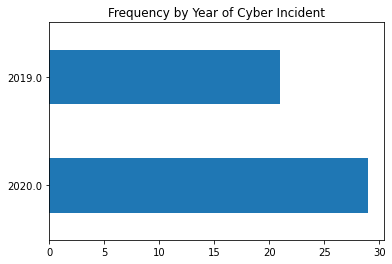

In [43]:
dfsecincidents=Secincidentfinal_df['Year'].astype(float)
dfsecincidents.value_counts().plot(kind='barh', title="Frequency by Year of Cyber Incident")
#redid the graph with Year as a float.  Same results

<AxesSubplot:title={'center':'Frequency by Year of Cyber Incident-Dataset3'}>

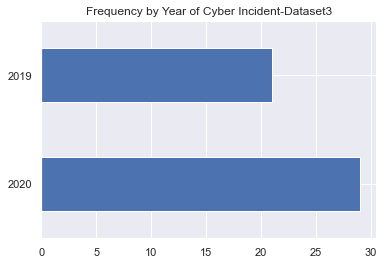

In [186]:
Secincidentfinal_df['Year'].value_counts().plot(kind='barh', title="Frequency by Year of Cyber Incident-Dataset3")

In [45]:
# Dataset4: Read the PRC Data Breach Chronology.csv" file.  It contains the Security incidents in the US 
#collected by a non-profit. 9015 records.  Oldest date of incident January 2005 and the latest October 2019. 
#No data in 2020.  These are all incidents in the US.

<AxesSubplot:title={'center':'Frequency by Year of Cyber Incident- Dataset4'}>

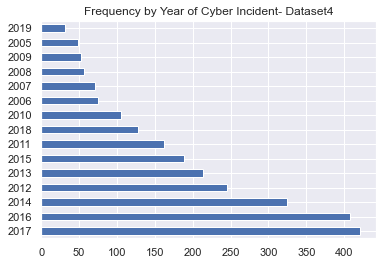

In [185]:
PRCBreach_final_df['Year of Breach'].value_counts().plot(kind='barh', title="Frequency by Year of Cyber Incident- Dataset4")

#This dataset shows that the highest hacking incidents happened in 2014 and 2015.  2019 was the lowest.  No data provided in 2020.
#  Feel this dataset may not have accurate or complete information.  We may not use this dataset in our analysis.

<AxesSubplot:title={'center':'Frequency by Year of Cyber Incident-Combined Dataset'}>

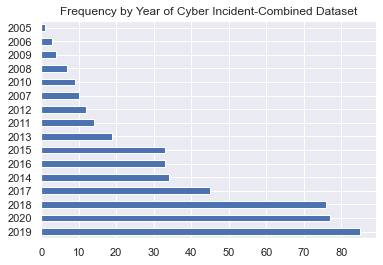

In [184]:
#Combined Dataset:  Histogram of the combined dataset of the two incidents datasets (Cyber Operations and Security Incidents)

big_df ['Year'].value_counts().plot(kind='barh', title="Frequency by Year of Cyber Incident-Combined Dataset")

#See code below how big_df was created by merging two datasets (Dataset2 - CyberOps and Dataset3 = SecIncidents above)

In [47]:
#PMF:  Dataset2 on field Type
#Type_category=cyberopsfinal_df.groupby(['Type']).count()
#Type_category

In [58]:
cyberopsfinal_df.head()

,Year,Category,Type,Description,Title,Affiliations,Victims,Sponsor
0,2020,Government,Espionage,The suspected Russian hackers conducted a week...,Attack on Austrian foreign ministry,Turla,Austrian Foreign Ministry,Russian Federation
1,2020,Government,Espionage,The suspected North Korean threat actor Konni ...,Spear-phishing campaign against unnamed U.S. g...,Konni Group,Employees of the U.S. government,Korea (Democratic People's Republic of)
2,2020,Private sector,Data destruction,Responsible for attacking infrastructure that ...,Australian Signals Directorate,NaN,NaN,Australia
3,2020,Military,Espionage,The Hamas-associated threat actor APT-C-23 tar...,Catfishing of Israeli soldiers,APT-C-23,Israeli Defense Forces (IDF) soldiers,"Palestine, State of"
4,2020,"Government, Private sector",Espionage,Iranian hackers attacked high-end networking e...,Targeting of U.S. companies and government age...,Fox Kitten,"U.S. government agencies, U.S. companies",Iran (Islamic Republic of)


In [48]:
df_1 = cyberopsfinal_df["Type"].value_counts()
df_1

Espionage            371
Sabotage              22
Denial of service     18
Data destruction      14
Financial Theft        7
Doxing                 6
Defacement             5
Name: Type, dtype: int64

In [49]:
sum1 = len(cyberopsfinal_df["Type"].value_counts())
sum1

7

In [50]:
df_2=pd.DataFrame(df_1)

In [51]:
df_2["item"]=df_2.index

In [52]:
df_2['probability']=df_2['Type']/sum1
df_2

,Type,item,probability
Espionage,371,Espionage,53.000000
Sabotage,22,Sabotage,3.142857
Denial of service,18,Denial of service,2.571429
Data destruction,14,Data destruction,2.000000
Financial Theft,7,Financial Theft,1.000000
Doxing,6,Doxing,0.857143
Defacement,5,Defacement,0.714286


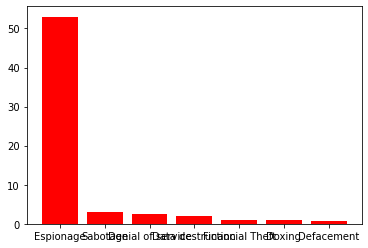

In [53]:
plt.bar(df_2['item'], df_2['probability'], color='r')
plt.show()

In [54]:
#CDF:  Dataset2 on field Type
import seaborn as sns
sns.set()

In [55]:
#first create normal distribution and generate random values
np.random.seed(0)
X_rand = np.random.normal(loc=0, scale=1.0, size=1000)


(array([  3.,   6.,   9.,  11.,  30.,  40.,  59.,  87., 103., 114., 116.,
        123.,  83.,  77.,  48.,  38.,  22.,  16.,  11.,   4.]),
 array([-3.04614305, -2.75586815, -2.46559324, -2.17531833, -1.88504342,
        -1.59476851, -1.3044936 , -1.0142187 , -0.72394379, -0.43366888,
        -0.14339397,  0.14688094,  0.43715585,  0.72743075,  1.01770566,
         1.30798057,  1.59825548,  1.88853039,  2.1788053 ,  2.46908021,
         2.75935511]),
 <BarContainer object of 20 artists>)

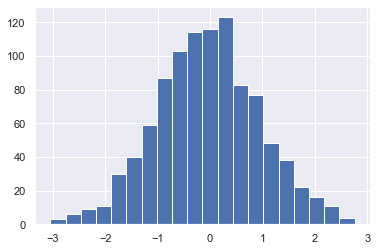

In [56]:
#Now visualize the above
plt.hist(X_rand, bins=20)

C:\Users\saima\anaconda3\envs\srahmanzaiDSC530\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

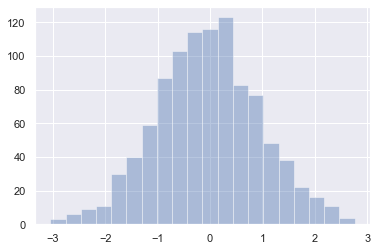

In [57]:
#Or
sns.distplot(X_rand, bins=20, kde=False)

<AxesSubplot:>

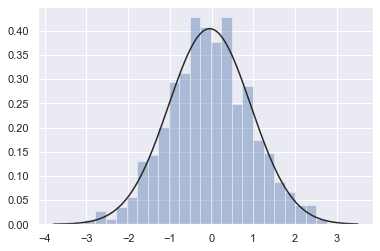

In [58]:
sns.distplot(X_rand, fit=stats.norm, kde=False)

In [59]:
#Distribution fitting

In [60]:
loc, scale=stats.norm.fit(X_rand)
loc, scale

(-0.045256707490195384, 0.9870331586690257)

In [61]:
#Calculate PDF
#linear space value of x

x=np.linspace(start=-5, stop=5, num=100)

In [62]:
#pdf
pdf=stats.norm.pdf(x, loc=loc, scale=scale)

Text(0, 0.5, 'PDF')

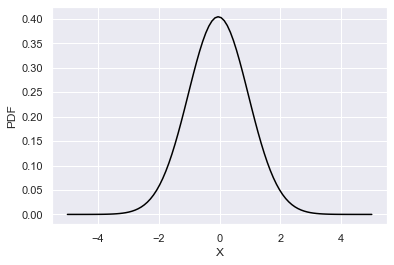

In [63]:
#plot
plt.plot(x,pdf,color='black')
plt.xlabel('X')
plt.ylabel('PDF')

In [64]:
#CDF

#cdf=stats.norm.cdf(x, loc=loc, scale=scale)
#cdf = stats.norm.cdf(df_1, loc=loc, scale=scale)

#cdf1=stats.norm.cdf(df_1, loc=loc, scale=scale)
#cdf1

In [65]:
mu=df_1.mean()
mu
#where df_1 is cyberopsfinal_df["Type"].value_counts()

63.285714285714285

In [66]:
sigma=df_1.std()
sigma

135.84269614240617

In [67]:
cdf=stats.norm.cdf(x, loc=mu, scale=sigma)

In [68]:
x=np.linspace(start=5, stop=375, num=100)

In [69]:
df_1 = cyberopsfinal_df["Type"].value_counts()
df_1

Espionage            371
Sabotage              22
Denial of service     18
Data destruction      14
Financial Theft        7
Doxing                 6
Defacement             5
Name: Type, dtype: int64

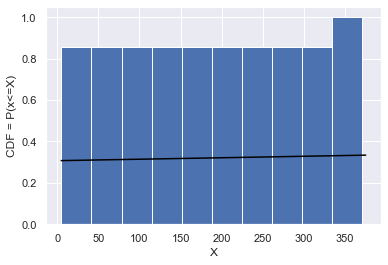

In [70]:
#plot
plt.hist(df_1, density=True, cumulative= True)
plt.plot(x,cdf,color='black')

plt.xlabel('X')
plt.ylabel('CDF = P(x<=X)')
plt.show()


In [71]:
#For Analytics Distribution, I will create a pareto chart of variable Type in the dataframe cyberopsfinal_df

In [72]:
df_1 = cyberopsfinal_df["Type"].value_counts()



In [85]:
df_2=pd.DataFrame(df_1)


In [73]:
df_2["item"]=df_2.index


In [74]:
df_3=df_2.sort_values(by='Type', ascending=False)
df_3

,Type,item,probability
Espionage,371,Espionage,53.000000
Sabotage,22,Sabotage,3.142857
Denial of service,18,Denial of service,2.571429
Data destruction,14,Data destruction,2.000000
Financial Theft,7,Financial Theft,1.000000
Doxing,6,Doxing,0.857143
Defacement,5,Defacement,0.714286


In [75]:
df_3["cumpercentage"]=df_3["Type"].cumsum()/df_3["Type"].sum()*100

C:\Users\saima\AppData\Local\Temp/ipykernel_21752/542301559.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_3["item"], rotation=45)


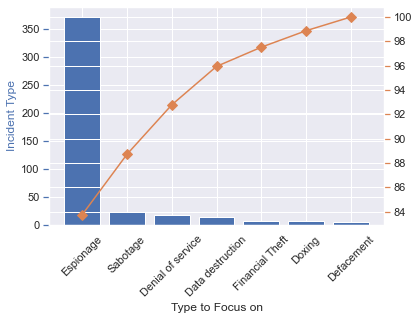

In [76]:
fig, ax1=plt.subplots()
ax1.bar(df_3.item, df_3["Type"], color="C0")
ax1.set_ylabel("Incident Type", color="C0")
ax1.tick_params(axis="y", color="C0")
ax1.set_xlabel("Type to Focus on")
ax1.set_xticklabels(df_3["item"], rotation=45)
ax2=ax1.twinx()
ax2.plot(df_3.item, df_3["cumpercentage"], color="C1", marker="D", ms=7)
#ax2.yaxis.set_major_formatter(formatter)
ax2.tick_params(axis="y", color="C1")
plt.show()

In [77]:
#Based on the above Paretto Distribution, Espionage Type is significant and
#need to be addressed to tackle this Cyber Incident Type

In [78]:
# Merging two incident files together and then analyzing the results (Cyber Ops and Sec_Incident files)>  I extracted 
# two fields from each file Year and Type.  I also renamed the Type names to make sure they are the same before merging.

In [116]:
df3_cyberops = cyberopsfinal_df[["Year", "Type"]]


df3_cyberops.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 473
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    474 non-null    object
 1   Type    443 non-null    object
dtypes: object(2)
memory usage: 11.1+ KB


In [81]:
df4_Secincident = Secincidentfinal_df[["Year", "Incident Type"]]
df4_Secincident.rename( columns={"Incident Type":"Type" } ,inplace=True)
df4_Secincident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    50 non-null     object
 1   Type    50 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


C:\Users\saima\anaconda3\envs\srahmanzaiDSC530\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [82]:
big_df = pd.concat([df3_cyberops, df4_Secincident], ignore_index=True)
big_df.info()
big_df






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    524 non-null    object
 1   Type    493 non-null    object
dtypes: object(2)
memory usage: 8.3+ KB


,Year,Type
0,2020,Espionage
1,2020,Espionage
2,2020,Data destruction
3,2020,Espionage
4,2020,Espionage
...,...,...
519,2020,Malware
520,2020,Other cyber incident
521,2020,Phishing
522,2020,Ransomware


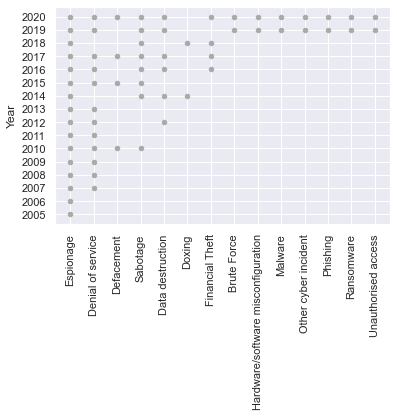

In [83]:
# Create scatterplot of the combined dataset and focus on the two variables Year and Type of incident

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import Series, DataFrame

from pylab import rcParams
from pandas.plotting import scatter_matrix



df5=big_df.groupby(['Year', 'Type']).size().reset_index(name="Count2")
df5.head()

df5.plot(kind='scatter', x='Type', y='Year', c='darkgrey')
plt.xticks(rotation=90)
plt.xlabel("")
plt.show()
#The scatterchart below shows a strong positive linear relationship between variables Year and Type of incidents.  As Years pass, the incidents increase. Espionage having the most
#frequency or use almost every year.


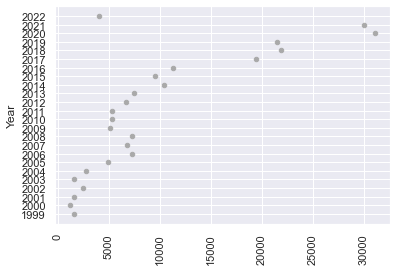

In [84]:
#We had one dataset that showed vulnerabilities.  One of my hypothesis that vulnerabilities increase with as years grow.  I
#drew a scatter plot diagram between the year and the number of vulnerabilities.  The scatter plot shows a strong positive linear
#relationship as shown below.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import Series, DataFrame

from pylab import rcParams
from pandas.plotting import scatter_matrix

df6=allitems.groupby(['Year']).size().reset_index(name="Count2")
df6.head()
df6.tail()


df6.plot(kind='scatter', x='Count2', y='Year', c='darkgrey')
plt.xticks(rotation=90)
plt.xlabel("")
plt.show()

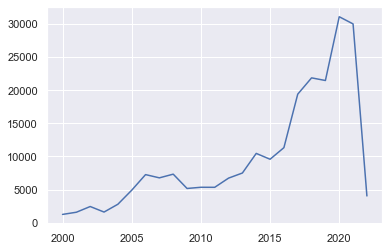

In [98]:
#Hypothesis Testing:Onthe Vulnerabilities Dataset:

FirstSample = df6[1:30]['Year_int']
SecondSample = df6[1:30]['Count2']
pyplot.plot(FirstSample, SecondSample)
pyplot.show()


In [99]:
#Hypothesis testing using Pearson Correlation between the Year and Type count variables for the vulnerabiltiy dataset
from scipy.stats import pearsonr
stat, p = pearsonr(FirstSample, SecondSample)
print('stat=%3f, p=%5f' % (stat, p))

if p > 0.05:
    print('Independent Samples')
else:
    print('Dependent Samples')

stat=0.760836, p=0.000025
Dependent Samples


In [ ]:
#Covariance, Pearson’s correlation,
#We calculated the Covariance, Pearson's correlation on the vulnerability dataset first showing Security incidents by 
#time over the years.

In [174]:
#Correlation on Vulnerability dataset

df6.head()
df6['Year_int'] = df6['Year'].astype('int')
df6.info()
df6.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      24 non-null     object
 1   Count2    24 non-null     int64 
 2   Year_int  24 non-null     int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 608.0+ bytes


,Count2,Year_int
Count2,1.000000,0.766761
Year_int,0.766761,1.000000


In [175]:
# Covariance for the Vulnerabiliies dataset
df6.cov()
#Covariance is a part of statistics and it is the measure of the 
#relationship between two random variables or random problems.

,Count2,Year_int
Count2,7.691212e+07,47549.108696
Year_int,4.754911e+04,50.000000


In [ ]:
#The Pearson correlation coefficient, often referred to as Pearson’s r, is a measure of linear correlation between two 
#variables. This means that the Pearson correlation coefficient measures a normalized measurement of covariance 
#(i.e., a value between -1 and 1 that shows how much variables vary together).

In [179]:
##### Regression Analysis for variables in the vulnerability dataset.  

df6.head()

,Year,Count2,Year_int
0,1999,1579,1999
1,2000,1243,2000
2,2001,1573,2001
3,2002,2436,2002
4,2003,1600,2003


In [180]:
reg2=ols("Year_int ~ Count2", df6).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Year_int   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     31.39
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           1.24e-05
Time:                        01:07:23   Log-Likelihood:                -69.850
No. Observations:                  24   AIC:                             143.7
Df Residuals:                      22   BIC:                             146.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2004.6609      1.408   1423.295      0.000    2001.740    2007.582
Count2         0.0006      0.000      5.602      0.000       0.000       0.001
==============================================================================
Omnibus:                       14.103   Durbin-Watson:                   0.746
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.692
Skew:                           1.331   Prob(JB):                     0.000645
Kurtosis:                       5.757   Cond. No.                     1.90e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
#Hypothesis testing using Pearson Correlation on the combined datset by Year and Count of how many incidents by Year. 
#In order to do that, first I had to prep the file make some numeric conversions as Hypothesis works on numeric fields as 
#shown below.



In [ ]:
#testing df5 again using encoding to change categoricl variables to numeric so I can 
#run statistic commands, remove N/As etc.

In [160]:
big_df = pd.concat([df3_cyberops, df4_Secincident], ignore_index=True)
big_df['Year_int'] = big_df['Year'].astype('int')
big_df.info()
big_df.isnull().sum()
big_df.dropna(inplace=True)
big_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      524 non-null    object
 1   Type      493 non-null    object
 2   Year_int  524 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 10.4+ KB


Year        0
Type        0
Year_int    0
dtype: int64

In [161]:
big_df.Type.unique()

array(['Espionage', 'Data destruction', 'Financial Theft', 'Sabotage',
       'Defacement', 'Denial of service', 'Doxing', 'Unauthorised access',
       'Brute Force', 'Hardware/software misconfiguration', 'Malware',
       'Other cyber incident', 'Phishing', 'Ransomware'], dtype=object)

In [162]:
#!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df=le.fit_transform(big_df['Type'])
df
series=pd.Series((df), name="Type_Num")
series


0       5
1       5
2       1
3       5
4       5
       ..
488     8
489     9
490    10
491    11
492    13
Name: Type_Num, Length: 493, dtype: int32

In [163]:
big_df=pd.concat([big_df, series], axis=1)

big_df


,Year,Type,Year_int,Type_Num
0,2020,Espionage,2020.0,5.0
1,2020,Espionage,2020.0,5.0
2,2020,Data destruction,2020.0,1.0
3,2020,Espionage,2020.0,5.0
4,2020,Espionage,2020.0,5.0
...,...,...,...,...
519,2020,Malware,2020.0,NaN
520,2020,Other cyber incident,2020.0,NaN
521,2020,Phishing,2020.0,NaN
522,2020,Ransomware,2020.0,NaN


In [164]:
big_df.isnull().sum()
big_df.dropna(inplace=True)
big_df.isnull().sum()
big_df


,Year,Type,Year_int,Type_Num
0,2020,Espionage,2020.0,5.0
1,2020,Espionage,2020.0,5.0
2,2020,Data destruction,2020.0,1.0
3,2020,Espionage,2020.0,5.0
4,2020,Espionage,2020.0,5.0
...,...,...,...,...
488,2019,Brute Force,2019.0,8.0
489,2019,Hardware/software misconfiguration,2019.0,9.0
490,2019,Malware,2019.0,10.0
491,2019,Other cyber incident,2019.0,11.0


In [165]:
big_df.Year.unique()

array(['2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013',
       '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005'],
      dtype=object)

In [166]:
grouped_df = big_df.groupby(['Year_int']).size().reset_index(name="Count")
grouped_df

,Year_int,Count
0,2005.0,1
1,2006.0,3
2,2007.0,10
3,2008.0,7
4,2009.0,4
5,2010.0,9
6,2011.0,14
7,2012.0,12
8,2013.0,19
9,2014.0,34


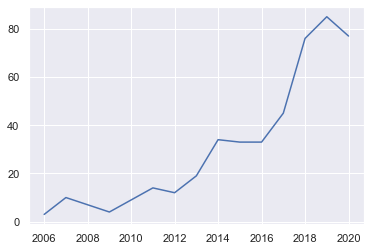

In [156]:
#Hypothesis Testing:Onthe combined dataset:
import matplotlib
from matplotlib import pyplot
%matplotlib inline

FirstSample = grouped_df[1:100]['Year_int']
SecondSample = grouped_df[1:100]['Count']
pyplot.plot(FirstSample, SecondSample)
pyplot.show()

In [167]:
#Hypothesis testing using Pearson Correlation between teh Year and Type variables for the combined dataset
from scipy.stats import pearsonr
stat, p = pearsonr(FirstSample, SecondSample)
print('stat=%3f, p=%5f' % (stat, p))

if p > 0.05:
    print('Independent Samples')
else:
    print('Dependent Samples')

stat=0.913623, p=0.000002
Dependent Samples


In [168]:
#correlation of combined file

grouped_df.head()

grouped_df.corr()

,Year_int,Count
Year_int,1.000000,0.910558
Count,0.910558,1.000000


In [169]:
#covariance of combined file
grouped_df.cov()

,Year_int,Count
Year_int,22.666667,122.133333
Count,122.133333,793.716667


In [170]:
##### Regression Analysis for variables in the combined dataset.  This includes Incident Type Independent variable and
#Year Dependent variable

import pandas as pd
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.api as sm

grouped_df.head()

,Year_int,Count
0,2005.0,1
1,2006.0,3
2,2007.0,10
3,2008.0,7
4,2009.0,4


In [173]:
reg=ols("Year_int ~ Count", grouped_df).fit()
reg.summary()

C:\Users\saima\anaconda3\envs\srahmanzaiDSC530\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Year_int   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     67.93
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           9.67e-07
Time:                        00:50:56   Log-Likelihood:                -33.020
No. Observations:                  16   AIC:                             70.04
Df Residuals:                      14   BIC:                             71.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2008.0569      0.742   2707.646      0.000    2006.466    2009.647
Count          0.1539      0.019      8.242      0.000       0.114       0.194
==============================================================================
Omnibus:                        3.229   Durbin-Watson:                   0.528
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                1.295
Skew:                          -0.238   Prob(JB):                        0.523
Kurtosis:                       1.690   Cond. No.                         57.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#PMF, CDF etc. on Combined file below.  It was done earlier on Dataset2

In [ ]:
#PMF:  Comvined dataset on field Type
#Type_category=cyberopsfinal_df.groupby(['Type']).count()
#Type_category

In [191]:
df_1 = big_df["Type"].value_counts()
df_1

Espionage                             371
Sabotage                               22
Denial of service                      18
Data destruction                       14
Financial Theft                         7
Doxing                                  6
Defacement                              5
Brute Force                             3
Hardware/software misconfiguration      3
Malware                                 3
Other cyber incident                    3
Phishing                                3
Unauthorised access                     2
Ransomware                              2
Name: Type, dtype: int64

In [192]:
sum1 = len(big_df["Type"].value_counts())
sum1

14

In [193]:
df_2=pd.DataFrame(df_1)

In [194]:
df_2["item"]=df_2.index

In [195]:
df_2['probability']=df_2['Type']/sum1
df_2

,Type,item,probability
Espionage,371,Espionage,26.500000
Sabotage,22,Sabotage,1.571429
Denial of service,18,Denial of service,1.285714
Data destruction,14,Data destruction,1.000000
Financial Theft,7,Financial Theft,0.500000
Doxing,6,Doxing,0.428571
Defacement,5,Defacement,0.357143
Brute Force,3,Brute Force,0.214286
Hardware/software misconfiguration,3,Hardware/software misconfiguration,0.214286
Malware,3,Malware,0.214286


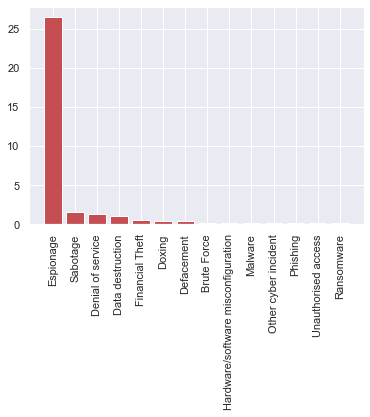

In [197]:
plt.bar(df_2['item'], df_2['probability'], color='r')
plt.xticks(rotation=90)
plt.show()

In [198]:
#CDF:  Combined Dataset on field Type
import seaborn as sns
sns.set()

In [199]:
#first create normal distribution and generate random values
np.random.seed(0)
X_rand = np.random.normal(loc=0, scale=1.0, size=1000)

(array([  3.,   6.,   9.,  11.,  30.,  40.,  59.,  87., 103., 114., 116.,
        123.,  83.,  77.,  48.,  38.,  22.,  16.,  11.,   4.]),
 array([-3.04614305, -2.75586815, -2.46559324, -2.17531833, -1.88504342,
        -1.59476851, -1.3044936 , -1.0142187 , -0.72394379, -0.43366888,
        -0.14339397,  0.14688094,  0.43715585,  0.72743075,  1.01770566,
         1.30798057,  1.59825548,  1.88853039,  2.1788053 ,  2.46908021,
         2.75935511]),
 <BarContainer object of 20 artists>)

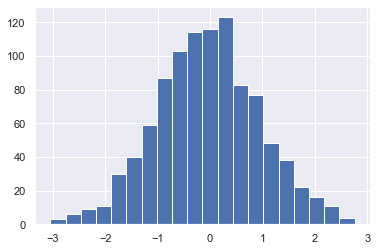

In [200]:
#Now visualize the above
plt.hist(X_rand, bins=20)

C:\Users\saima\anaconda3\envs\srahmanzaiDSC530\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

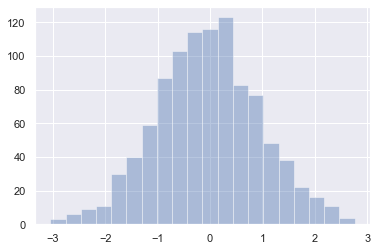

In [201]:
#Or
sns.distplot(X_rand, bins=20, kde=False)

<AxesSubplot:>

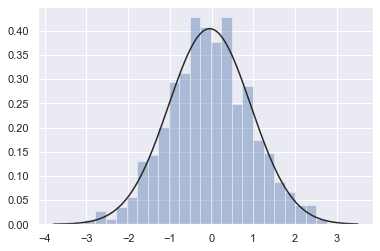

In [202]:
sns.distplot(X_rand, fit=stats.norm, kde=False)

In [203]:
#Distribution fitting

In [204]:
loc, scale=stats.norm.fit(X_rand)
loc, scale

(-0.045256707490195384, 0.9870331586690257)

In [206]:
#Calculate PDF
#linear space value of x

x=np.linspace(start=-5, stop=5, num=100)

In [207]:
#pdf
pdf=stats.norm.pdf(x, loc=loc, scale=scale)

Text(0, 0.5, 'PDF')

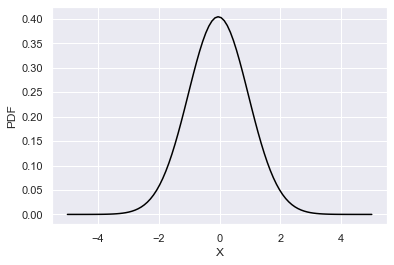

In [208]:
#plot
plt.plot(x,pdf,color='black')
plt.xlabel('X')
plt.ylabel('PDF')

In [209]:
#CDF

#cdf=stats.norm.cdf(x, loc=loc, scale=scale)
#cdf = stats.norm.cdf(df_1, loc=loc, scale=scale)

#cdf1=stats.norm.cdf(df_1, loc=loc, scale=scale)
#cdf1

In [210]:
mu=df_1.mean()
mu
#where df_1 is cyberopsfinal_df["Type"].value_counts()

33.0

In [211]:
sigma=df_1.std()
sigma

97.4924060159007

In [212]:
cdf=stats.norm.cdf(x, loc=mu, scale=sigma)

In [213]:
x=np.linspace(start=5, stop=375, num=100)

In [214]:
df_1 = cyberopsfinal_df["Type"].value_counts()
df_1

Espionage            371
Sabotage              22
Denial of service     18
Data destruction      14
Financial Theft        7
Doxing                 6
Defacement             5
Name: Type, dtype: int64

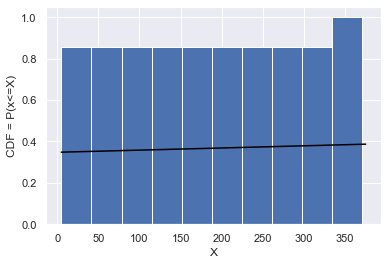

In [215]:
#plot
plt.hist(df_1, density=True, cumulative= True)
plt.plot(x,cdf,color='black')

plt.xlabel('X')
plt.ylabel('CDF = P(x<=X)')
plt.show()

In [216]:
#For Analytics Distribution, I will create a pareto chart of variable Type in the dataframe cyberopsfinal_df

In [217]:
df_1 = big_df["Type"].value_counts()

In [218]:
df_2=pd.DataFrame(df_1)

In [219]:
df_2["item"]=df_2.index

In [220]:
df_3=df_2.sort_values(by='Type', ascending=False)
df_3

,Type,item
Espionage,371,Espionage
Sabotage,22,Sabotage
Denial of service,18,Denial of service
Data destruction,14,Data destruction
Financial Theft,7,Financial Theft
Doxing,6,Doxing
Defacement,5,Defacement
Brute Force,3,Brute Force
Hardware/software misconfiguration,3,Hardware/software misconfiguration
Malware,3,Malware


In [221]:
df_3["cumpercentage"]=df_3["Type"].cumsum()/df_3["Type"].sum()*100

C:\Users\saima\AppData\Local\Temp/ipykernel_21752/542301559.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_3["item"], rotation=45)


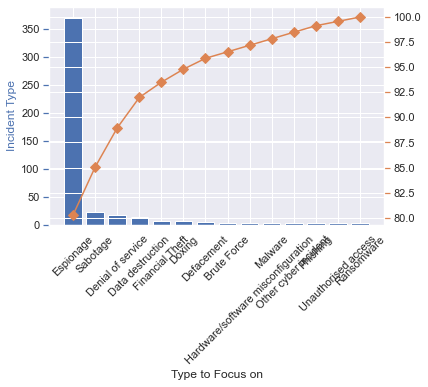

In [222]:
fig, ax1=plt.subplots()
ax1.bar(df_3.item, df_3["Type"], color="C0")
ax1.set_ylabel("Incident Type", color="C0")
ax1.tick_params(axis="y", color="C0")
ax1.set_xlabel("Type to Focus on")
ax1.set_xticklabels(df_3["item"], rotation=45)
ax2=ax1.twinx()
ax2.plot(df_3.item, df_3["cumpercentage"], color="C1", marker="D", ms=7)
#ax2.yaxis.set_major_formatter(formatter)
ax2.tick_params(axis="y", color="C1")
plt.show()

In [ ]:
#Based on the above Paretto Distribution, Espionage Type, even for the combined dataset is significant and
#need to be addressed to tackle this Cyber Incident Type